### **Consumo y Demanda de Energía en Sistemas de Potencia**

#### **Objeto**

Poner en práctica los conceptos y temas vistos en el curso propedéutico, a fin de plantear propuestas de aproximación para el análisis del comportamiento del consumo y la demanda de Energía Eléctrica (EE) en un sistema de potencia.

#### **Contenido:**
+ Definiciones
+ Planteamientos de aproximación propuestos:
+ Pronóstico de la demanda y consumo
+ Cálculo de energía consumida
+ Análisis estadístico del perfil de demanda y consumo
+ Modelado del fenómeno (demanda/consumo de EE)
+ Interpolación/Extrapolación
+ Integrador de funciones
+ Series de tiempo
+ Conclusiones y trabajos futuros

#### **Planteamientos**

**1 - Pronóstico de la demanda y consumo**
Dada una estadística de valores de demanda y consumo (de septiembre de 2017 a julio de 2020 –BD de trabajo) se pretende caracterizar un modelo polinomial para estimar los valores de demanda/consumo de los próximos meses.

**¿Por qué?**
El pronóstico del consumo y la demanda de energía eléctrica es una actividad esencial para la operación y planeación de los sistemas de potencia, a fin de garantizar su correcta operación en los diferentes horizontes de tiempo.

**2 - Cálculo del consumo de energía**
La información de consumo recabada en la BD de trabajo se calcula utilizando promedios para cada intervalo de 1 hora. Se desea calcular la energía de el mismo periodo utilizando funciones aproximadas que se ajusten a la forma de la curva de demanda y compararlas.

**¿Por qué?**
Es importante definir la granularidad de la información que se puede obtener de los sistemas de registros. Considerar periodos menores a 1 hora podría significar una gran cantidad de recursos para su almacenamiento y procesamiento. Por eso es importante definir hasta qué grado se pueden obtener estimaciones adecuadas con diferentes espaciamiento en las muestras. 

**3 - Análisis estadístico del perfil de demanda/consumo**
La forma que tiene una curva de demanda presenta ciertos patrones que sugieren comportamientos repetitivos en diferentes horizontes de tiempo (día, semana, año). Se plantea analizar el fenómeno de demanda de energía y consumo como una serie de tiempo para obtener más información de su comportamiento.

**¿Por qué?**
Debido a las variaciones que presenta el fenómeno de demanda y consumo de EE es de interés dar una representación estadística para identificar patrones que se puedan predecir y ayuden en la toma de decisiones en la operación y planeación del sistema de potencia.

#### **Visualización**



In [4]:
import numpy as np
import pandas as pd

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Dataset de trabajo
data_horas = pd.read_csv("Datos_csv.csv")
data_horas.head(5)

,muestras,anio,fecha,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
0,1,2017,01-sep,0,1,6872.013385,6976.172363,1
1,2,2017,01-sep,1,2,6660.573651,6709.388672,1
2,3,2017,01-sep,2,3,6504.232961,6568.017090,1
3,4,2017,01-sep,3,4,6435.836442,6502.294434,1
4,5,2017,01-sep,4,5,6437.741557,6384.402344,1


Cuyos datos estadísticos descriptivos son los siguientes

In [7]:
list_int = np.array(list(data_horas["dema_int"]))
list_inst = np.array(list(data_horas["dem_inst"]))

In [8]:
data_int = pd.DataFrame(list_int , columns = ['Demanda Integrada']) 
data_inst = pd.DataFrame(list_inst , columns = ['Demanda Instantánea']) 
data_int['Demanda Instantánea'] = data_inst['Demanda Instantánea']
data_int.head(5)

,Demanda Integrada,Demanda Instantánea
0,6872.013385,6976.172363
1,6660.573651,6709.388672
2,6504.232961,6568.017090
3,6435.836442,6502.294434
4,6437.741557,6384.402344


In [25]:
data_int.describe()

,Demanda Instantánea
count,25152.000000
mean,7734.933778
std,977.956108
min,4230.882324
25%,6998.106567
50%,7794.049072
75%,8478.522950
max,11267.710940


Nos interesa, de momento, encontrar un modelo fiable que se ajuste a los datos de la demanda instantánea, que es el promedio de la energía consumida en una hora

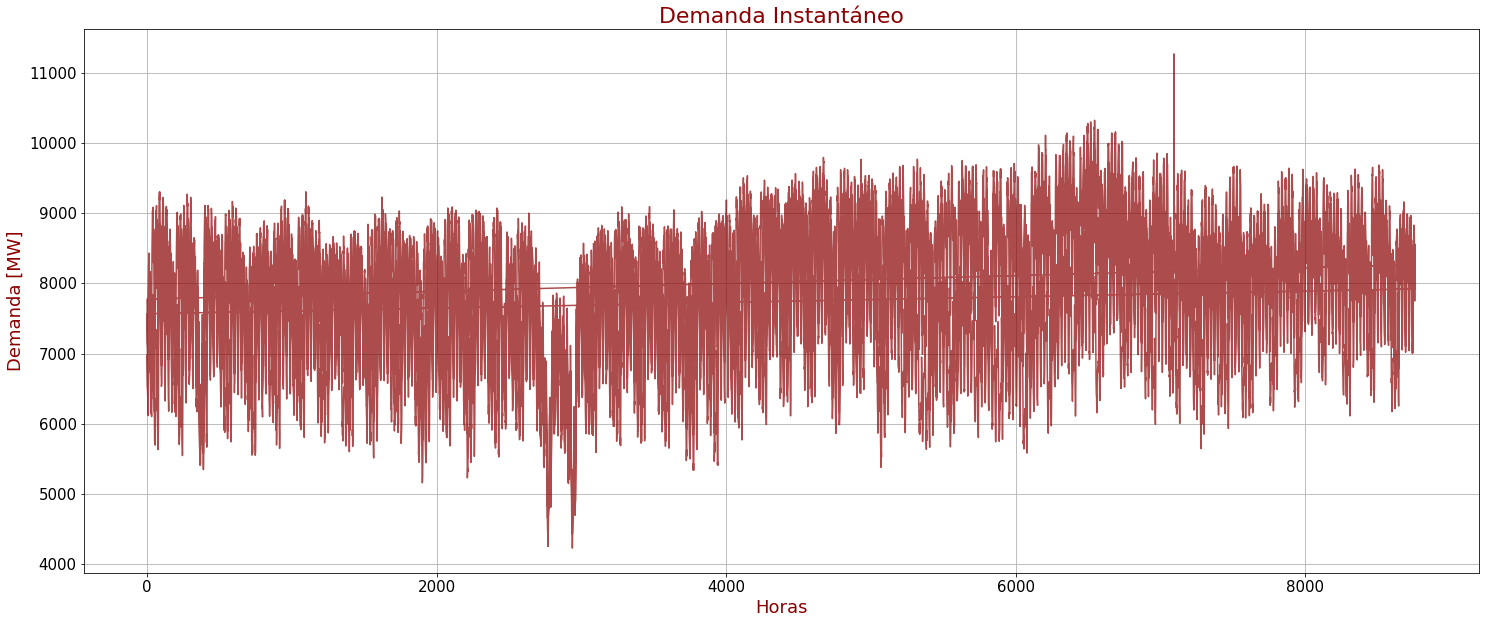

In [32]:
plt.figure(figsize=(25,10))
plt.plot(data_horas.muestras, data_horas.dem_inst, 'b-', color = 'darkred' , alpha = 0.7)
plt.title("Demanda Instantáneo" , fontsize = 22 , color = 'darkred')
plt.xlabel("Horas" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Demanda_Instantanea.png')
plt.show()

Donde el promedio del consumo horario se muestra a continuación.

Como vemos, los datos presentan muchas oscilaciones, debido a ello, tomaremos los promedios por día, semanas y meses con el objetivo de observar si los datos se simplifican lo suficiente como para hallar un modelo simple que se ajuste a ellos.


+ **Demanda Promedio Díaria:** 

De acuerdo a los datos del análisis descriptivo se cuentan con 25152 registros de horas, por ello, sacaremos los promedios de cada 24 registros consecutivos para obtener el promedio de la demanda diaría.

In [9]:
horas_tot = 25152 # Horas totales registradas
num_d = int(horas_tot/24)
prom_dia = []
for i in range(0,num_d):
    ini = 24*i
    end = 24*(1+i)
    data_i = data_horas[ini:end]
    prom_dia.append(data_i["dem_inst"].mean())

In [10]:
prom_a_dia = np.array(prom_dia)
x_dia = np.array(list(range(1,len(prom_dia)+1)))

In [11]:
mpoints = len(prom_dia)
x_dia_grph_1 = np.linspace(min(x_dia) , max(x_dia) , mpoints)
y_dia_grph_1 = np.array(prom_dia)

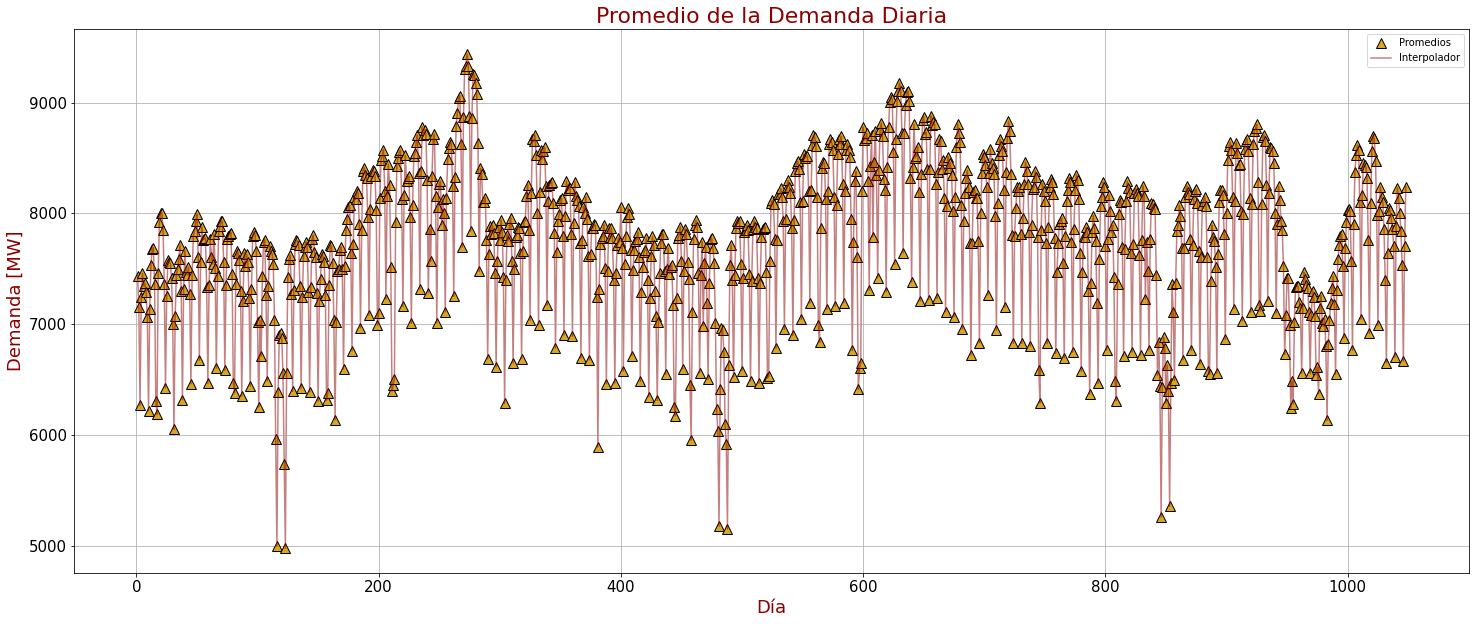

In [34]:
plt.figure(figsize=(25,10))
plt.plot(x_dia , prom_a_dia , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_dia_grph_1 , y_dia_grph_1 , color = 'darkred' , alpha = 0.5)
plt.title("Promedio de la Demanda Diaria" , fontsize = 22 , color = 'darkred')
plt.xlabel("Día" , fontsize = 18 , color = 'darkred')
plt.ylabel("Demanda [MW]" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Promedio_Dia.png')
plt.show()

#### **Interpolador**

La función *polyfit()* sólo acepta hasta un número máximo para el grado del polinomio para interpolar, debido a ello, tomaremos una muestra cada cinco días de los promedios diarios del $80\%$ de los datos para hacer el interpolador con un polinomio de grado 140, siendo este número el máximo número que acepta para el grado del interpolador.

In [40]:
n_m = []
x = []
k = 0
n_puntos = 140 # Solo submúltiplos de 1,800
for i in range(n_puntos):
    n_m.append(k)
    x.append(k*2)
    k = k+(840/n_puntos)

y = []
for i in range(len(x)):
    y.append(data_dia.Promedio[n_m[i]])

coef_aj = np.polyfit(x, y, len(x)-1)

neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         data_dia.Dia, data_dia.Promedio, 'k-')

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [39]:
data_dia = pd.DataFrame(prom_dia, columns = ['Promedio'])
dia = pd.DataFrame(x_dia, columns = ['Dia']) 
data_dia['Dia'] = dia['Dia']

In [ ]:
prom_a_dia = np.array(prom_dia)
x_dia = np.array(list(range(1,len(prom_dia)+1)))

In [13]:
dias_tot = 1048 # Horas totales registradas
num_d = int(dias_tot*0.8/140)
num_d

5

In [41]:
prom_dia_80 = []
for i in range(0,140):
    ini = 5*i
    end = 5*(1+i)
    data_i = data_dia[ini:end]
    prom_dia_80.append(data_i["Promedio"].mean())

+ **Demanda Semanal**

